# 서울시 유가 정보 분석

In [274]:
import pandas as pd

# file name 합치기
from glob import glob   # file name을 하나로 묶어줌

In [275]:
station_files = glob("../Data/oil/*.xls")
station_files

['../Data/oil/지역_위치별(주유소) (1).xls',
 '../Data/oil/지역_위치별(주유소) (10).xls',
 '../Data/oil/지역_위치별(주유소) (11).xls',
 '../Data/oil/지역_위치별(주유소) (12).xls',
 '../Data/oil/지역_위치별(주유소) (13).xls',
 '../Data/oil/지역_위치별(주유소) (14).xls',
 '../Data/oil/지역_위치별(주유소) (15).xls',
 '../Data/oil/지역_위치별(주유소) (16).xls',
 '../Data/oil/지역_위치별(주유소) (17).xls',
 '../Data/oil/지역_위치별(주유소) (18).xls',
 '../Data/oil/지역_위치별(주유소) (19).xls',
 '../Data/oil/지역_위치별(주유소) (2).xls',
 '../Data/oil/지역_위치별(주유소) (20).xls',
 '../Data/oil/지역_위치별(주유소) (21).xls',
 '../Data/oil/지역_위치별(주유소) (22).xls',
 '../Data/oil/지역_위치별(주유소) (23).xls',
 '../Data/oil/지역_위치별(주유소) (24).xls',
 '../Data/oil/지역_위치별(주유소) (3).xls',
 '../Data/oil/지역_위치별(주유소) (4).xls',
 '../Data/oil/지역_위치별(주유소) (5).xls',
 '../Data/oil/지역_위치별(주유소) (6).xls',
 '../Data/oil/지역

In [276]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2) # 컬럼 레코드 포함 3번째부터 불러오기
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [277]:
len(station_raw)

456

In [278]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2145,2170,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2183,2207,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2305,2183,2199,-
3,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,2210,2235,1600
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,2355,2215,2239,1943


In [279]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      456 non-null    object
 1   상호      456 non-null    object
 2   주소      456 non-null    object
 3   상표      456 non-null    object
 4   전화번호    456 non-null    object
 5   셀프여부    456 non-null    object
 6   고급휘발유   456 non-null    object
 7   휘발유     456 non-null    object
 8   경유      456 non-null    object
 9   실내등유    456 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [280]:
# 필요항목 발췌
stations = pd.DataFrame({'Oil_store' : station_raw['상호'], 
                         '주소' : station_raw['주소'],
                         '가격' : station_raw['휘발유'],
                         '셀프' : station_raw['셀프여부'],
                         '상표' : station_raw['상표']
})
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [281]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 33
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  456 non-null    object
 1   주소         456 non-null    object
 2   가격         456 non-null    object
 3   셀프         456 non-null    object
 4   상표         456 non-null    object
dtypes: object(5)
memory usage: 21.4+ KB


In [282]:
count = 0
for i in [region.split()[0] for region in stations['주소']]:
    if i == '서울특별시':
        print(count)
    count += 1


0
7
90
95
132
236
246
289
311
337
390


In [283]:
# 주소의 서울 특별시를 서울로 변경하기

stations['주소'] = stations['주소'].str.replace('서울특별시', '서울')
stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [284]:
# 주우소별 자치구 항목 추가
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


In [285]:
# 구 컬럼 확인
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [286]:
# 가격 정보가 '-'인곳 확인
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구
29,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
11,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
14,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
15,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
20,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [287]:
# 여러개의 파일을 합하여 만든 데이터 셋이기 때문에 index가 중복되어 있는 것을 볼 수 있다.
# 인덱스를 재배열
stations.reset_index(drop=True, inplace=True)

In [288]:
stations[stations.index == 8]

,Oil_store,주소,가격,셀프,상표,구
8,sk해뜨는주유소,서울 강동구 상일로 132 (강일동),2245,Y,SK에너지,강동구


In [289]:
stations[stations['가격'].isnull()]

,Oil_store,주소,가격,셀프,상표,구


In [290]:
removeIndex = stations[stations['가격'] == '-'].index

In [291]:
stations.drop(removeIndex, axis=0, inplace=True)
len(stations)

447

In [292]:
stations[stations['가격'] == '-']

,Oil_store,주소,가격,셀프,상표,구


In [293]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    object
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: object(6)
memory usage: 24.4+ KB


In [294]:
# 가격컬럼의 Type 변환
stations = stations.astype({'가격':'int'})
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    int64 
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


In [295]:
import matplotlib.pyplot as plt

In [296]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

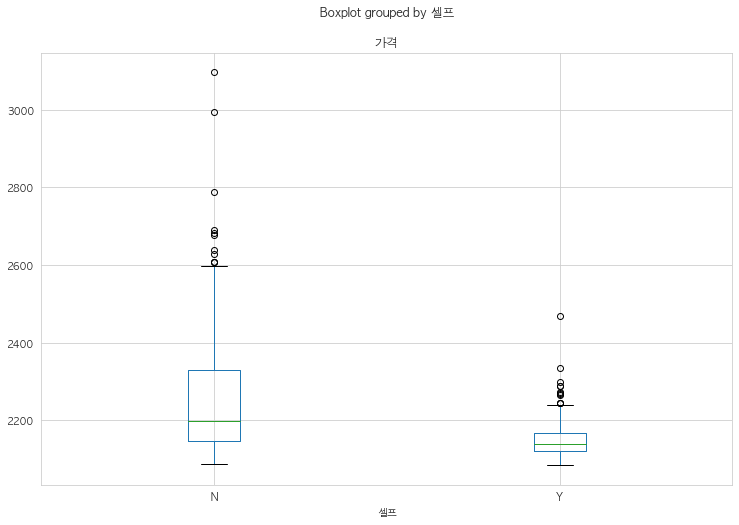

In [297]:
# Boxplot grouped by 셀프

stations.boxplot(
    column='가격',  # y축
    by = '셀프',    # x축
    figsize=(12,8)
)

plt.show()

In [298]:
import seaborn as sns

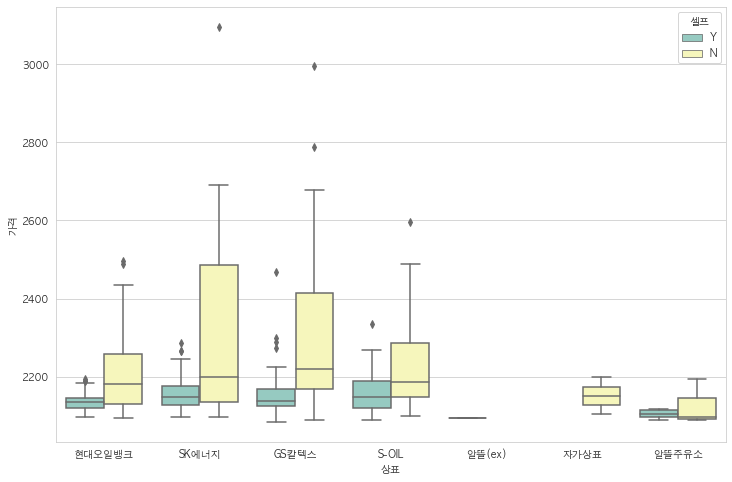

In [299]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
    x='상표',
    y='가격',
    hue='셀프',
    data = stations,
    palette='Set3'
)
plt.show()

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


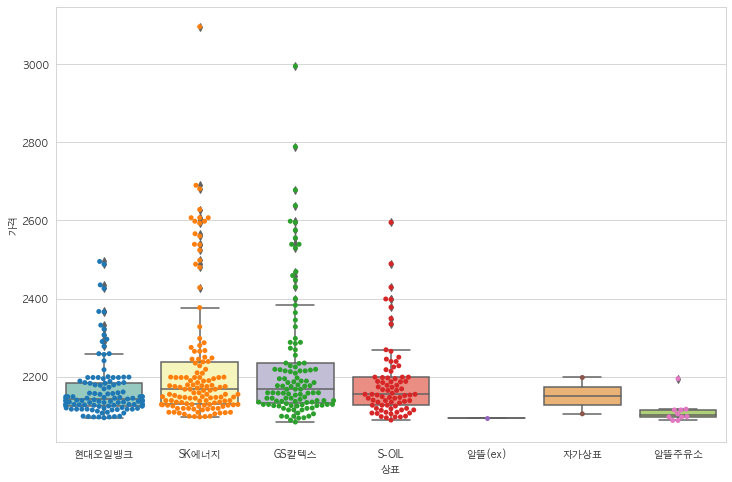

In [300]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))
sns.boxplot(
    x='상표',
    y='가격',
    data = stations,
    palette='Set3'
)
sns.swarmplot(
    x='상표',
    y='가격',
    data = stations,
)
plt.show()

In [301]:
# 가격이 높은 순으로 정렬 (top10)

stations.sort_values('가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구
241,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구


In [302]:
# 가격이 낮은 순으로 정렬 (top10)

stations.sort_values('가격').head(10)

,Oil_store,주소,가격,셀프,상표,구
222,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
297,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
298,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
169,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
170,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
223,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
194,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
380,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
68,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
224,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [303]:
# 가장 비싼 가격과 싼 가격 차이
stations['가격'].max() - stations['가격'].min()

1012

In [304]:
import numpy as np

In [305]:
# 구별 가격 평균
 
gu_data = pd.pivot_table(stations, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data

,가격
구,
강남구,2335.882353
강동구,2240.000000
강북구,2117.363636
강서구,2170.375000
관악구,2170.571429
광진구,2145.714286
구로구,2173.200000
금천구,2122.636364
노원구,2166.533333


In [306]:
# 구별 가격 평균 높은 순 (top10)
# stations.groupby('구').mean().sort_values('가격', ascending=False).head(10)
gu_data.sort_values('가격', ascending=False).head(10)

,가격
구,
용산구,2544.769231
중구,2466.500000
종로구,2387.125000
강남구,2335.882353
강동구,2240.000000
성동구,2239.470588
서초구,2232.758621
마포구,2212.416667
영등포구,2184.185185


### 지도표시


In [307]:
import json
import folium

In [308]:
geo_path = "../Data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=10.5,
    tiles='Stamen Toner',

)
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, '가격'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)


map

In [309]:
# 가격이 제일 비싼 Top10 구성
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10) 
oil_price_top10.reset_index(drop=True, inplace=True)

In [310]:
# 가격이 제일 싼 Top10 구성
oil_price_bottom10 = stations.sort_values(by='가격').head(10) 
oil_price_bottom10.reset_index(drop=True, inplace=True)

In [311]:
import urllib.request

client_id = "knyo4tcwfn"
client_secret = "GpwWAGlloYMUQhozeVUbtzSqKjxV5bgDmK1gYWMv"

# top 위도, 경도
lng_top = []
lat_top = []

# bottom 위도, 경도
lng_bottom = []
lat_bottom = []

# 기름 비싼 매장 10
for address in oil_price_top10['주소']:
    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON 형식
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    # 200이면 정상
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    import json
    data1 = json.loads(enText)

    lng_top.append(data1['addresses'][0]['x'])
    lat_top.append(data1['addresses'][0]['y'])

# 기름 싼 매장 주소 10
for address in oil_price_bottom10['주소']:
    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText #JSON 형식
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    # 200이면 정상
    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    import json
    data1 = json.loads(enText)

    lng_bottom.append(data1['addresses'][0]['x'])
    lat_bottom.append(data1['addresses'][0]['y'])
    

In [312]:
# top10 위도 경도 추가
oil_price_top10['lat'] = lat_top
oil_price_top10['lng'] = lng_top

In [313]:
# bottom10 위도 경도 추가
oil_price_bottom10['lat'] = lat_bottom
oil_price_bottom10['lng'] = lng_bottom

In [315]:
# top10
for name, lat, lng in zip(oil_price_top10['Oil_store'], lat_top, lng_top):
    folium.Marker(
        [lat,lng], popup=name,
        icon=folium.Icon(icon='flag',color='red')
        ).add_to(map)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        fill_color='skyblue',
        fill_opacity=0.7,
        popup=name,
        
    ).add_to(map)
# bottom10
for name, lat, lng in zip(oil_price_bottom10['Oil_store'], lat_bottom, lng_bottom):
    folium.Marker([lat,lng], popup=name).add_to(map)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        fill_color='red',
        fill_opacity=0.7,
        popup=name
    ).add_to(map)
map